# Gradient Descent for Linear Regression

## Introduction
Welcome to our exploration of the Gradient Descent optimization algorithm within the context of linear regression. In this notebook, we'll apply Gradient Descent to the California Housing dataset to predict housing prices based on various features. This method is crucial for finding the best-fit parameters that minimize the error in predictions, making it invaluable for regression tasks.

## Dataset and Problem Statement
The California Housing dataset includes data from the 1990 California census. It provides an excellent opportunity to model housing prices based on demographic and geographic information. Features include median income, housing age, average rooms per household, average bedroom per household, population, average occupancy, latitude, and longitude. Our goal is to predict the median house value for California districts based on these features.

## Problem Simplification
For this exercise, we will use linear regression to predict the continuous variable 'median house value'. We will apply Gradient Descent to optimize the Mean Squared Error (MSE) between our predictions and the actual values.

## Algorithm Overview
**Gradient Descent** is particularly suited for linear regression, as it efficiently minimizes the MSE cost function.

1. **Initialization**: Begin by initializing the regression coefficients to small random values.
2. **Cost Function**: Use MSE to quantify the error between predicted outputs and actual values.
3. **Gradient Calculation**: Compute the gradient of the MSE with respect to each coefficient.
4. **Updating Coefficients**: Adjust the weights by moving in the direction opposite to the gradient, scaled by a learning rate.
5. **Iteration**: Repeat the gradient calculation and weight updates until the change in the MSE becomes minimal, or a set number of iterations is reached.
6. **Stochastic and Mini-batch Variants**: While full-batch gradient descent uses all data, stochastic and mini-batch versions use random samples or small batches to enhance computational efficiency and convergence speed.

## Advantages and Disadvantages
**Advantages**:
- **Scalability**: Efficiently handles large datasets.
- **Flexibility**: Adaptable to various machine learning models.
- **Simplicity**: Conceptually straightforward and easy to implement.

**Disadvantages**:
- **Sensitivity to Learning Rate**: Requires careful tuning; improper settings can lead to non-convergence or excessive training time.
- **Local Minima**: Risk of converging to local minima in non-convex functions.
- **Feature Scaling**: Necessitates standardized or normalized features for effective optimization.
- **Initial Conditions**: Starting values can significantly influence outcomes.
- **Plateaus**: Can slow near plateaus or saddle points, affecting convergence speed.

## Implementation
This section details loading the dataset, exploring the data, preprocessing inputs, and finally, applying Gradient Descent to train a linear regression model.

Data head:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedianHouseValue  
0    -122.23             4.526  
1    -122.22             3.585  
2    -122.24             3.521  
3    -122.25             3.413  
4    -122.25             3.422  

Data description:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   

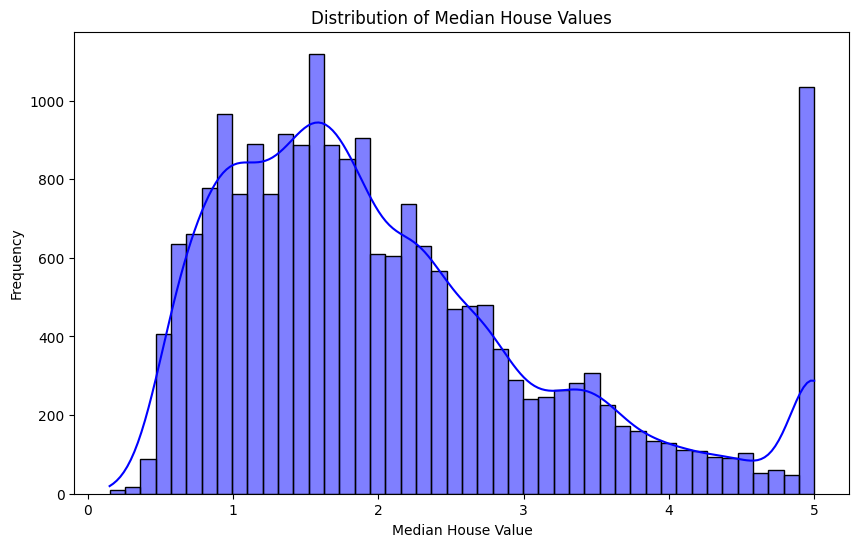

Test MSE: 0.5493
Test R^2: 0.5808


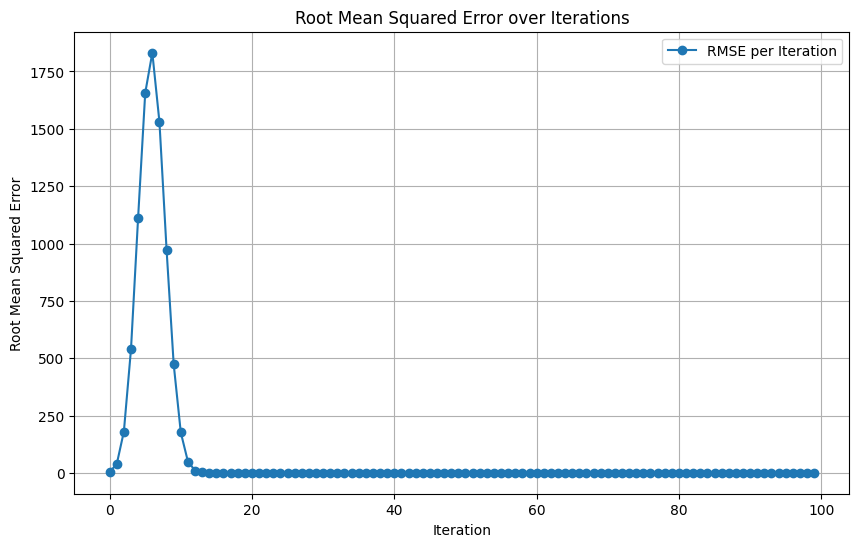

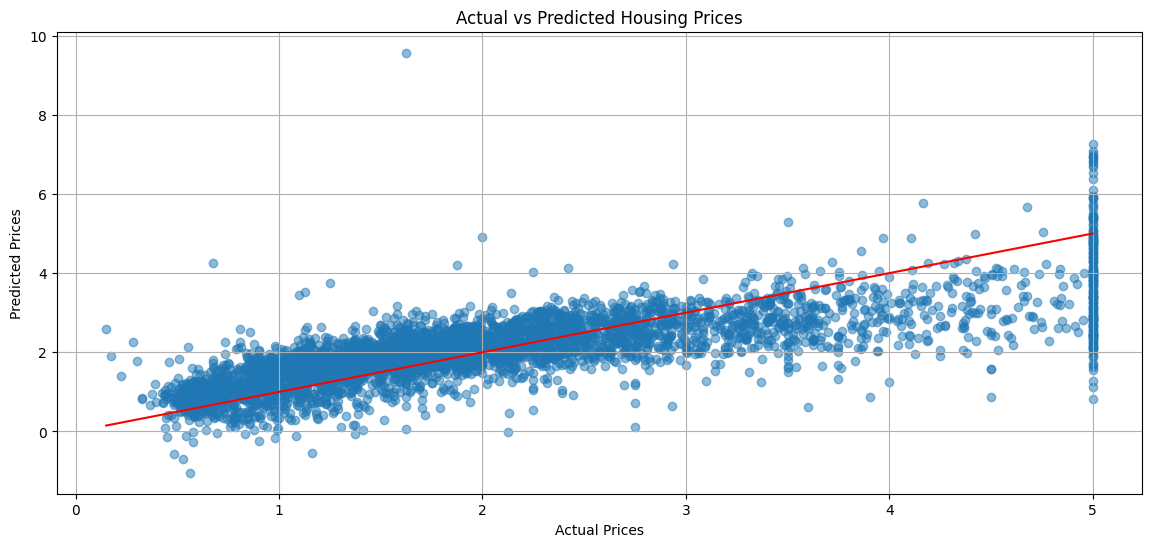

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target
feature_names = housing.feature_names

# Convert to DataFrame for easier manipulation and visualization
housing_df = pd.DataFrame(X, columns=feature_names)
housing_df['MedianHouseValue'] = y

# Data Exploration
print("Data head:")
print(housing_df.head())

print("\nData description:")
print(housing_df.describe())

print("\nCorrelation matrix:")
print(housing_df.corr())

# Visualizing the distribution of median house values
plt.figure(figsize=(10, 6))
sns.histplot(housing_df['MedianHouseValue'], kde=True, color='blue')
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the SGDRegressor with warm_start set to True to keep updating the model
sgd_regressor = SGDRegressor(max_iter=1, tol=None, warm_start=True, eta0=0.01, random_state=42)

mse_list = []
iterations = 100

# Manually iterate and update the model while recording MSE
for _ in range(iterations):
    sgd_regressor.partial_fit(X_train, y_train)
    y_pred_train = sgd_regressor.predict(X_train)
    mse = mean_squared_error(y_train, y_pred_train)
    mse_list.append(mse)

# Predict on the test set
y_pred_test = sgd_regressor.predict(X_test)

# Calculate test MSE and R-squared
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Test MSE: {test_mse:.4f}')
print(f'Test R^2: {test_r2:.4f}')

# Plotting the MSE over iterations
plt.figure(figsize=(10, 6))
plt.plot(np.sqrt(mse_list), label='RMSE per Iteration', marker='o')
plt.title('Root Mean Squared Error over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# Visualizing actual vs predicted values
plt.figure(figsize=(14, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.title('Actual vs Predicted Housing Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.grid(True)
plt.show()

### Conclusion

The SGDRegressor model demonstrated rapid initial learning, as evidenced by the quick drop in RMSE at the start of the training process. However, we observed diminishing returns in improvement over subsequent iterations, leading to a plateau in the RMSE value.

The final evaluation of our model on the test dataset resulted in an MSE of 0.5493 and an R-squared value of 0.5808. While the model captures general trends within the housing market data, the actual vs. predicted price plot indicates room for improvement, especially in accurately predicting higher-value properties.

To sum up, the model provides a solid starting point with a moderate R-squared value, indicating that approximately 58% of the variability in housing prices is explained by the model. Future endeavors could focus on enhancing model performance through feature engineering, model complexity adjustments, or exploring non-linear regression techniques to better account for the diverse factors influencing housing prices.